(n,elastic) rate: 37.687710566860815 +/- 0.008554704312234
(n,inelastic) rate: 0.005817809101087453 +/- 1.7274469605880885e-06
(n,2n) rate: 0.000713418021127562 +/- 3.685201559424714e-06
(n,na) rate: 0.0009779954318641488 +/- 3.704476254342671e-06
(n,np) rate: 9.891990603353685e-06 +/- 2.0377505907228263e-07
(n,$\gamma$) rate: 0.41770397283100297 +/- 0.0001589743898788239
(n,p) rate: 0.0004715582169357747 +/- 1.2121638250200274e-06
(n,d) rate: 1.212679062563083e-05 +/- 9.864431575608053e-08
(n,t) rate: 0.0028204189920245457 +/- 1.2521035980330027e-06
(n,a) rate: 0.003555313830284859 +/- 4.960006909889259e-06
(n,elastic) rate: 34.25478219570093 +/- 0.006743154010422587
(n,inelastic) rate: 0.01072137850424137 +/- 3.251709750079121e-06
(n,2n) rate: 0.0009013992773543942 +/- 3.676267565156765e-06
(n,na) rate: 0.0014477158313371985 +/- 5.118210288073702e-06
(n,np) rate: 1.173653236018942e-05 +/- 2.1818804747336535e-07
(n,$\gamma$) rate: 0.4486074672609256 +/- 0.000153949419486105
(n,p) rate

/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: Future

(n,elastic) rate: 35.313950190267015 +/- 0.006528044140628973
(n,inelastic) rate: 0.01871532624767044 +/- 4.4411652262013344e-06
(n,2n) rate: 0.0011056665527500909 +/- 4.565386469708376e-06
(n,na) rate: 0.0019659887394701046 +/- 7.136234528651975e-06
(n,np) rate: 1.3641288723060209e-05 +/- 2.3970078924625753e-07
(n,$\gamma$) rate: 0.5588946697879446 +/- 0.00018361674332267834
(n,p) rate: 0.0005585634406469734 +/- 1.3520483496650459e-06
(n,d) rate: 2.357489960001656e-05 +/- 1.6496318427870722e-07
(n,t) rate: 0.0015458096474075976 +/- 1.028248317446399e-06
(n,a) rate: 0.007248240211211472 +/- 9.328011588979264e-06


/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({
/tmp/ipykernel_27529/1383620900.py:57: Future

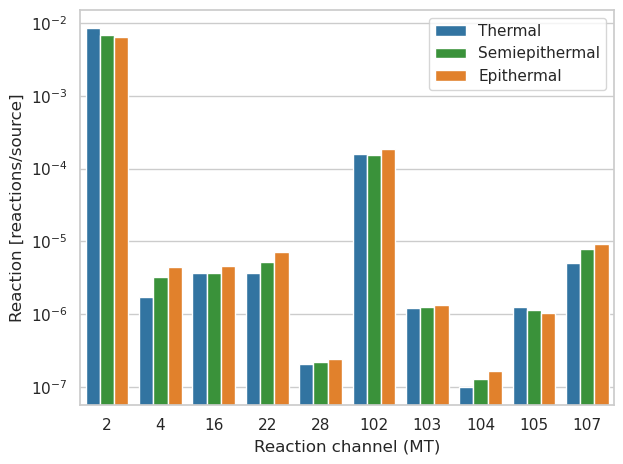

In [1]:
import openmc
import matplotlib.pyplot as plt
import os
import sys
TOOLS_PATH = f"{os.getenv('MASTER_PROJECT_ROOT_FOLDER')}/logistics"
sys.path.insert(0, TOOLS_PATH)
from tools import run_tools, nuclear_data_tools, model_tools, endf_tools
import pandas as pd

import seaborn as sns
sns.set(style="whitegrid")

results_idx = {
    model_tools.THERMAL_REACTOR: 1,
    model_tools.SEMIEPITHERMAL_REACTOR: 2,
    model_tools.EPITHERMAL_REACTOR: 3,
}

colors = ["tab:blue", "tab:green", "tab:orange"] 

folder_filename = lambda run_id: f"../results/RUNDATA_R16_{run_id}"

df = pd.DataFrame()

for REACTOR_MODEL, i in results_idx.items():
    run_settings = run_tools.load_run_settings_json(folder_filename(i))
    color = colors[i-1]

    # Make sure reactor_model is correct
    assert run_settings["reactor_model"] == REACTOR_MODEL

    statepoint_number = run_settings["active_batch_count"] + run_settings["inactive_batch_count"]
    sp = openmc.StatePoint(f"../results/RUNDATA_R16_{i}/statepoint.{statepoint_number}.h5")

    # print(sp.tallies)

    tallydf1=sp.tallies[3].get_pandas_dataframe()
    # print(tallydf1.head())


    for score in ["2", "4", "16", "22", "28", "102", "103", "104", "105", "107"]:
        # Get label:
        label = endf_tools.MT_to_label(int(score), short=True)
        # Overwrites as OpenMC has different labling standards
        if score == "4": label = "(n,level)"
        if score == "102": label = "(n,gamma)"

        real_label = endf_tools.MT_to_label(int(score), short=True)

        tallydf1reactionrate=tallydf1[tallydf1['score']==label]
        rate = tallydf1reactionrate["mean"].values[0]
        rate_std = tallydf1reactionrate["std. dev."].values[0]

        print(f"{real_label} rate: {rate} +/- {rate_std}")

        # Add to dataframe
        df = df.append({
            "REACTOR_MODEL": REACTOR_MODEL.capitalize(),
            "MT": score,
            "real_label": real_label,
            "rate": rate,
            "rate std": rate_std,
        }, ignore_index=True)

    
g = sns.barplot(df, x="MT", y="rate std", hue="REACTOR_MODEL", palette=colors)
g.set_yscale("log")
_ = g.set(xlabel="Reaction channel (MT)", ylabel="Reaction [reactions/source]")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])
plt.tight_layout()
plt.savefig("reaction_rates_per_MT.pdf")